<a href="https://colab.research.google.com/github/shayar/DM-Final-Project/blob/main/MJC_SS_Data_Mining_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Data Mining Final Project

by

Matthew Curran and

Shayar Shrestha

# Load Data

In [1]:
import pandas as pd

url = 'http://pluto.hood.edu/~dong/datasets/CBC_3200.csv'
DATA = pd.read_csv(url, header='infer')
DATA.head(1)

,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,1712,14148,0,218,2,2,4,0,0,0,0,0,0,0,0,0,0,1


# Exploratory Data Analysis

In [2]:
# DATA.dtypes
# Result: all columns are of type int.

In [3]:
# Remove ID type columns:
df = DATA.copy(deep = True)
Seq = df['Seq#']
IDs = df['ID#']
df = df.drop(columns = ['Seq#', 'ID#'])
df.head(1)

,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,218,2,2,4,0,0,0,0,0,0,0,0,0,0,1


In [4]:
# Explore columns 'M' thru 'FirstPurch'.
# df['M'].value_counts()
# df['R'].value_counts()
df['F'].value_counts()
# df['FirstPurch'].value_counts()

# Conclusion: these three columns are not one-hot-encoded.

,count
F,
1,998
2,971
3,152
7,135
8,133
11,129
4,124
10,123
12,121


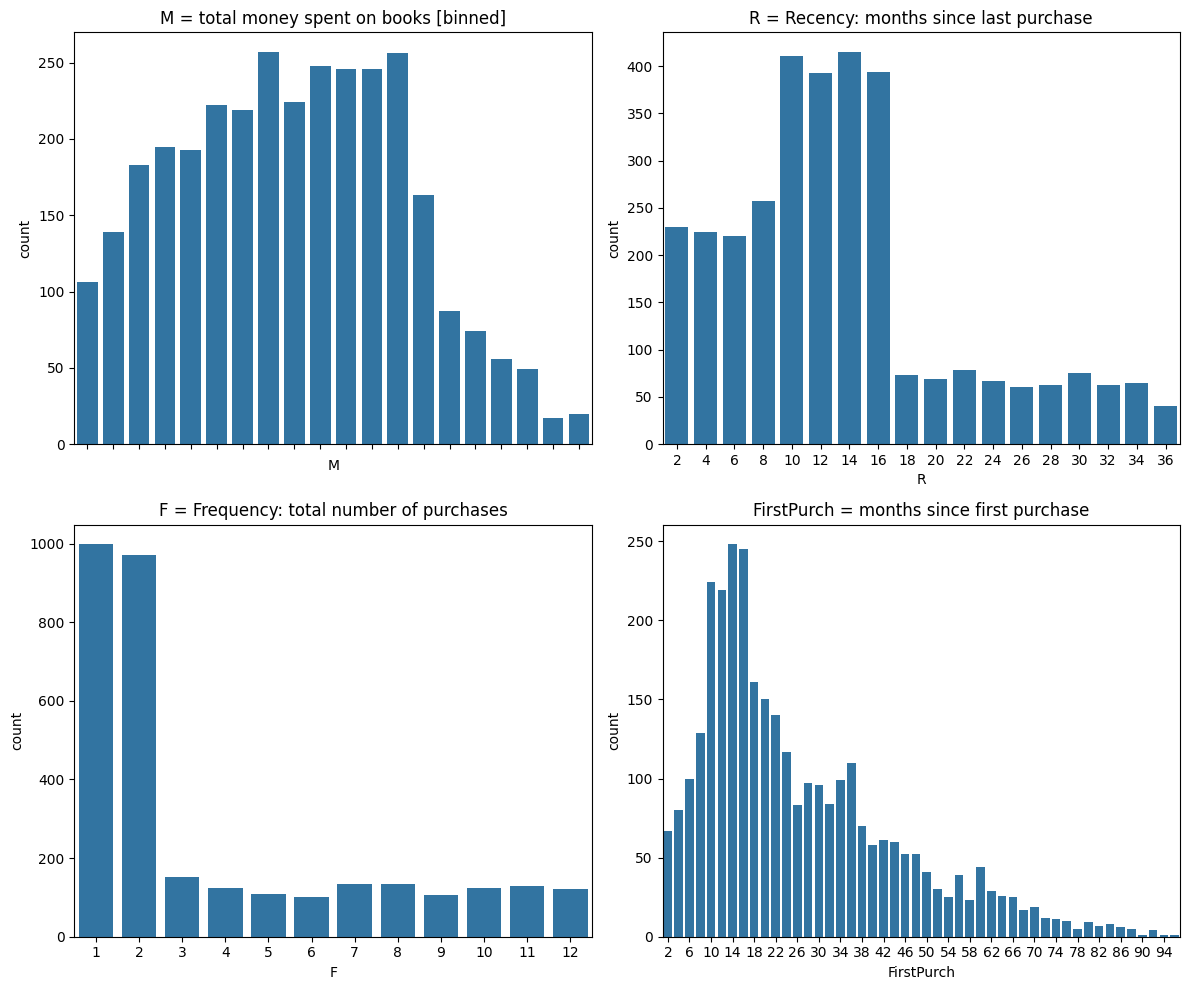

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

bin_edges = pd.cut(df['M'], bins=20)

sns.countplot(x=bin_edges, ax=axs[0, 0])
# sns.countplot(x='M', data=df, ax=axs[0, 0])
axs[0, 0].set_title('M = total money spent on books [binned]')
axs[0, 0].set_xticklabels([])

sns.countplot(x='R', data=df, ax=axs[0, 1])
axs[0, 1].set_title('R = Recency: months since last purchase')

sns.countplot(x='F', data=df, ax=axs[1, 0])
axs[1, 0].set_title('F = Frequency: total number of purchases')

sns.countplot(x='FirstPurch', data=df, ax=axs[1, 1])
axs[1, 1].set_title('FirstPurch = months since first purchase')
axs[1, 1].set_xticks(axs[1, 1].get_xticks()[::2])

plt.tight_layout()
plt.show()

These 4 columns all have interesting distributions. With the exception of 'FirstPurch', none of them looke much like any standard statistical distribution.

'R' and 'FirstPurch' are mostly telling us about the waxing/waning popularity of the store. The both seem to indicate a general decline in popularity starting about 10 months ago.

'FirstPurch' shows that the store peaked in popularity (in terms of new customers) during the period spanning roughly 10-22 months ago.


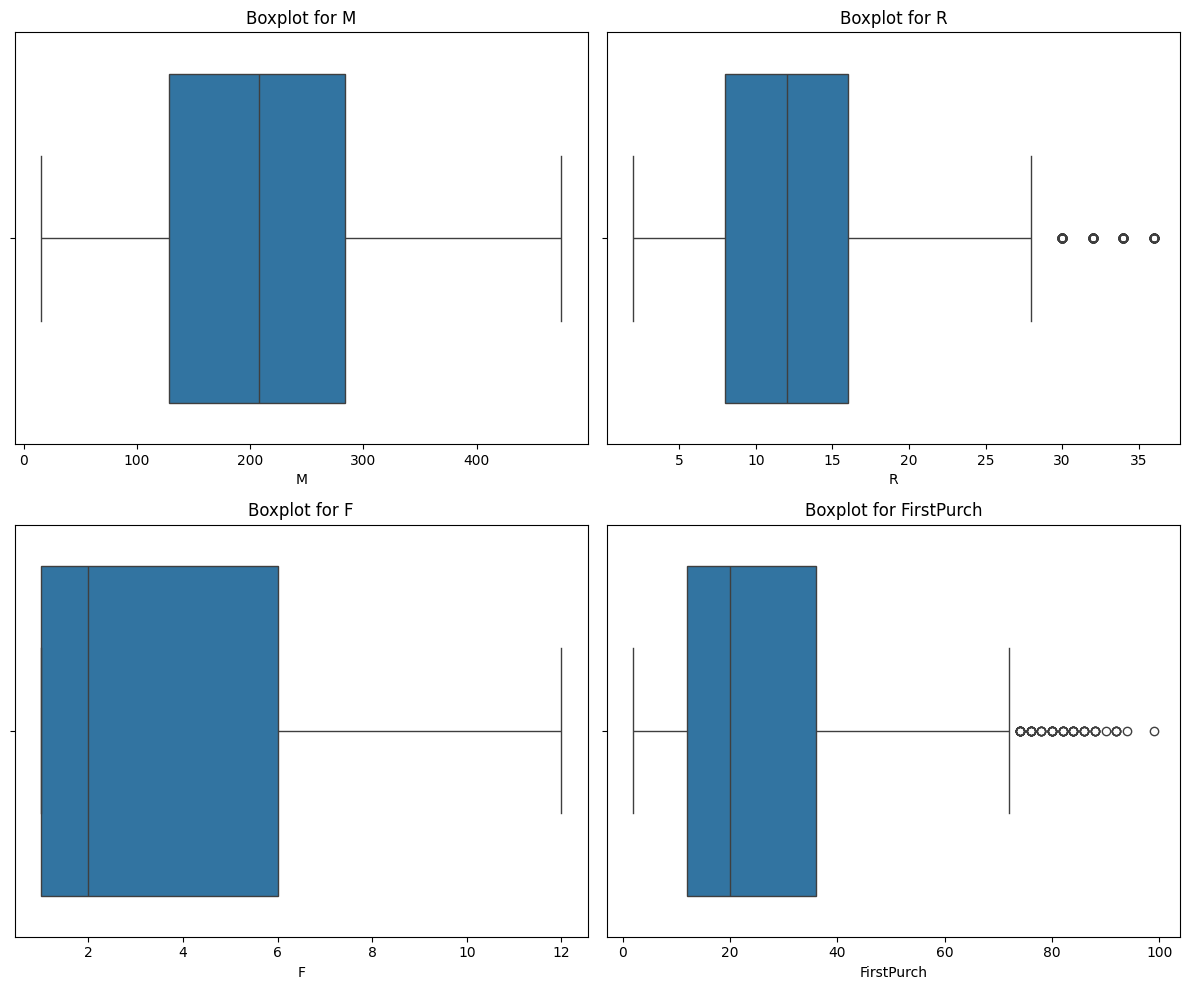

In [6]:
# Outliers.

# Box and whisker plots:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(x=df['M'], ax=axs[0, 0])
axs[0, 0].set_title('Boxplot for M')

sns.boxplot(x=df['R'], ax=axs[0, 1])
axs[0, 1].set_title('Boxplot for R')

sns.boxplot(x=df['F'], ax=axs[1, 0])
axs[1, 0].set_title('Boxplot for F')

sns.boxplot(x=df['FirstPurch'], ax=axs[1, 1])
axs[1, 1].set_title('Boxplot for FirstPurch')

plt.tight_layout()
plt.show()

These plots indicate no outliers for 'M' and 'F', and several outliers for 'R' and 'FirstPurch'. These outliers are simply customers from the earliest days.

One unusual thing we notice is that the earliest customers in 'FirstPurch' datae back to ~100 months ago, but the earliest customers in 'R' date back to only ~36 months ago.

In [7]:
# Print complete record (all columns) of the the customers with 'R' more than 35:
view_01 = df.query('R > 35')
view_02 = view_01.sort_values(by='FirstPurch', ascending=False)
view_02[:10]

# Observation: there are zero customers who bought their last book more than 36
#  months ago, even among the 10+ customers who bought their first book more
#  than 60 months ago.

# Conclusion: there is some gap or error in the record-keeping or
#  record-keeping system, such that any 'R' greater than 36 is
#  not properly recorded.
# The number of records with 'R' = 36 is not extra large, so its unlikely
#  that their 'R' was simply rounded down to 36.

,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
2865,1,281,36,11,92,3,0,2,1,1,1,3,0,0,0,0
573,1,271,36,8,82,1,1,4,0,1,0,0,0,0,0,0
1652,1,287,36,8,76,2,0,2,0,0,0,0,1,0,0,0
2591,0,399,36,7,74,0,0,2,1,1,0,0,0,0,0,0
3040,1,162,36,6,66,1,0,1,1,1,0,0,0,0,0,0
2408,0,374,36,11,66,3,1,2,1,2,0,2,0,0,0,0
2760,0,214,36,7,64,1,0,3,2,0,0,0,0,1,0,0
2856,0,75,36,5,64,1,0,2,0,0,0,1,0,0,0,0
2627,0,393,36,12,64,1,3,2,3,0,2,1,0,0,0,1
1214,0,368,36,5,62,1,2,1,0,1,0,2,0,0,0,0


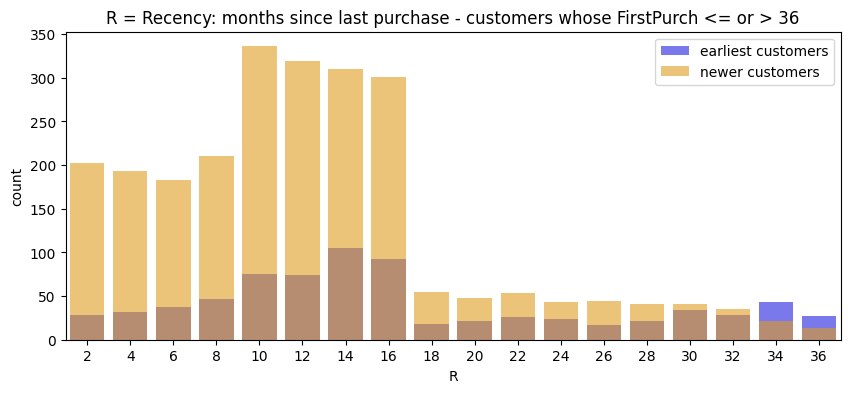

In [8]:
# Examine 'R' among early customers:
view_03 = df.query('FirstPurch > 36')
# view_04 = view_03.sort_values(by='R', ascending=True)
# view_04[:20]

view_05 = view_03['R'].value_counts()
view_05.sort_index(ascending=True)

view_06 = df.query('FirstPurch <= 36')

# Graph:
fig, axs = plt.subplots(1, 1, figsize=(10, 4))

sns.countplot(x='R', data=view_03, ax=axs, color='blue', alpha=0.6, label='earliest customers')
sns.countplot(x='R', data=view_06, ax=axs, color='orange', alpha=0.6, label='newer customers')

axs.set_title('R = Recency: months since last purchase - customers whose FirstPurch <= or > 36')

plt.show()

It looks kind of similar to the data for newer customers, with a spike from 18 to 16. (Although it is not clear why it is not an exact match) it is possible that the R>36 data was missing, and was filled in by a data scientist, with the aim of somehow matching the distribution of known values.

If so, the values of R for FirstPurch>36 are all completely fictitious.

Hypothesis A: better results can be obtained by replacing R with -36, for all FirstPurch>36 (this way, a NN or Random Forest can easily learn to ignore R for those values).

# Pre-Processing

In [9]:
df_clean = df.copy(deep=True)

my_mask = df_clean['FirstPurch'] > 36
df_clean.loc[my_mask, 'R'] = -36

view_07 = df_clean.query('FirstPurch > 36')
view_08 = view_07['R'].value_counts()
view_08.sort_index(ascending=True)

view_09 = view_07.sort_values(by='FirstPurch', ascending=False)
view_09[:5]

,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
2783,1,310,-36,12,99,2,2,2,2,0,0,4,0,0,0,0
1209,1,297,-36,12,94,1,0,7,1,2,1,0,0,0,0,0
2557,1,209,-36,10,92,4,0,3,0,1,0,1,0,0,0,0
2346,1,256,-36,11,92,1,2,5,1,0,0,0,0,0,0,0
858,1,171,-36,11,92,3,1,3,1,1,1,2,0,0,0,0


# Normalize

In [10]:
# Normalize.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numeric_columns = ['M', 'R', 'F', 'FirstPurch']
# all others are boolean or one-hot; i.e. do not need normalization.

# Scale only the numeric columns:
scaled_numeric = scaler.fit_transform(df[numeric_columns])

# Convert to a data frame:
df_scaled_numeric = pd.DataFrame(scaled_numeric, columns=numeric_columns)

# Combine with the non-numeric columns (booleans or one-hot):
df_scaled = pd.concat([df_scaled_numeric, df.drop(columns=numeric_columns)], axis=1)


# Separate labels/targets (predicted variable):
labels = df_scaled['Florence']
df_scaled = df_scaled.drop(columns=['Florence'])

df_scaled.head(1)


# Repeat for df_clean:
scaled_numeric_clean = scaler.fit_transform(df_clean[numeric_columns])
df_scaled_numeric_clean = pd.DataFrame(scaled_numeric_clean, columns=numeric_columns)
df_scaled_clean = pd.concat([df_scaled_numeric_clean, df_clean.drop(columns=numeric_columns)], axis=1)

labels_clean = labels  # For now, labels are identical.
df_scaled_clean = df_scaled_clean.drop(columns=['Florence'])

print(labels_clean[0])
df_scaled_clean.head(1)

1


,M,R,F,FirstPurch,Gender,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt
0,0.099549,0.045579,-0.517513,-1.227436,0,0,0,0,0,0,0,0,0,0,0


# Train Test Split

In [11]:
# Train Test Split.
from sklearn.model_selection import train_test_split

# Separate test data:
train_and_val, test, labels_train_and_val, labels_test \
    = train_test_split(df_scaled, labels, test_size=0.2, random_state=42)

clean_train_and_val, clean_test, clean_labels_train_and_val, clean_labels_test \
    = train_test_split(df_scaled_clean, labels_clean, test_size=0.2, random_state=42)

# # Separate validation data from train data
# X5_train_and_val, X5_test, y5_train_and_val, y5_test \
#     = train_test_split(X5, y2, test_size=0.2, random_state=42)

# # Separate validation data from train data:
# # (might not use these, if only doing cross-val)
# X5_train, X5_val, y5_train, y5_val \
#     = train_test_split(X5_train_and_val, y5_train_and_val, test_size=0.2, random_state=42)

In [77]:
print(train_and_val.shape)
print(test.shape)

(2560, 15)
(640, 15)


# Confusion Matrix helper function

In [88]:
# Helper function. For confusion matrix.
# Re-used code block from: MJC_post_EDA_Data_Mining_Midterm.ipynb [1].

import tensorflow as tf
# !apt-get install inkscape -y
!which inkscape
!inkscape --version

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import logging

# Suppress warnings:
tf.get_logger().setLevel(logging.ERROR)

def print_confusion_matrix(y_test, y_pred) -> None:
  cm = confusion_matrix(y_test, y_pred)
  # print("Confusion Matrix:")
  # print(cm)

  plt.figure(figsize=(4, 3))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=['Not Purchased', 'Purchased'],
              yticklabels=['Not Purchased', 'Purchased'],
              cbar=False)
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title('Confusion Matrix')
  plt.show()
  # Precision, recall, F1:,
  TP = cm[1, 1]  # True Positives
  FP = cm[0, 1]  # False Positives
  TN = cm[0, 0]  # True Negatives
  FN = cm[1, 0]  # False Negatives

  precision, recall, f1, accuracy = 0, 0, 0, 0
  if TP != 0:
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
  if precision + recall != 0:
    f1 = 2 * precision * recall / (precision + recall)
  if TP + TN + FP + FN != 0:
    accuracy = (TP + TN) / (TP + TN + FP + FN)
  auc = tf.keras.metrics.AUC()
  auc.update_state(y_test, y_pred)
  print(f"Precision: {precision:.3f}")
  print(f"Recall:    {recall:.3f}")
  print(f"F1:        {f1:.3f}")
  print(f"Accuracy:  {accuracy:.3f}")
  print(f"AUC:       {auc.result().numpy():.3f}")

/usr/bin/inkscape
Inkscape 1.1.2 (0a00cf5339, 2022-02-04)


# Methods

These are the stats if we just always guess the most common class:


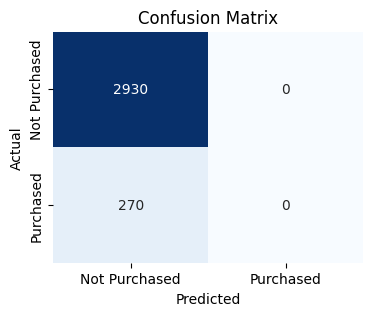

Precision: 0.00
Recall:    0.00
F1:        0.00
Accuracy:  0.92
AUC:       0.50


In [82]:
# Establish a baseline. Borrowed code [1].

print("These are the stats if we just always guess the most common class:")

# Confusion Matrix:
y_pred = [False] * len(labels)
print_confusion_matrix(labels.values, y_pred)

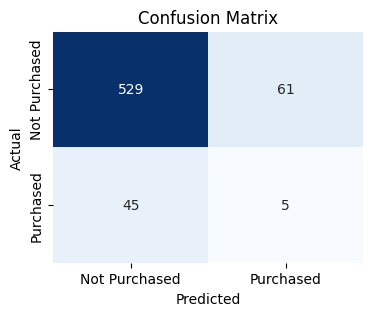

Precision: 0.08
Recall:    0.10
F1:        0.09
Accuracy:  0.83
AUC:       0.50


In [83]:
# Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(train_and_val, labels_train_and_val)
y_pred = model.predict(test)
print_confusion_matrix(labels_test, y_pred)

Using 'clean' data:


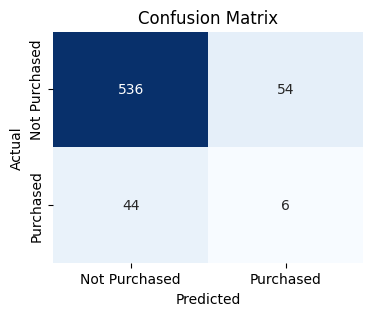

Precision: 0.10
Recall:    0.12
F1:        0.11
Accuracy:  0.85
AUC:       0.51


In [84]:
model.fit(clean_train_and_val, clean_labels_train_and_val)
y_pred = model.predict(clean_test)
print("Using 'clean' data:")
print_confusion_matrix(clean_labels_test, y_pred)

In [62]:
# Quick and simple: run a NN on both cases:

import tensorflow as tf
from tensorflow.keras import layers, models, metrics

model = models.Sequential([
    layers.Dense(15, activation='relu', input_shape=(15,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[metrics.AUC()])

history = model.fit(
    train_and_val,
    labels_train_and_val,
    epochs=15,
    batch_size=32,
    validation_split=0.2,  # This splits 20% of the data for validation automatically
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - auc_6: 0.4761 - loss: 0.5122 - val_auc_6: 0.4714 - val_loss: 0.3142
Epoch 2/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc_6: 0.5349 - loss: 0.3107 - val_auc_6: 0.5364 - val_loss: 0.2898
Epoch 3/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc_6: 0.6087 - loss: 0.2903 - val_auc_6: 0.5465 - val_loss: 0.2870
Epoch 4/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc_6: 0.6405 - loss: 0.2886 - val_auc_6: 0.5620 - val_loss: 0.2853
Epoch 5/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc_6: 0.6609 - loss: 0.2766 - val_auc_6: 0.5677 - val_loss: 0.2844
Epoch 6/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc_6: 0.6656 - loss: 0.2676 - val_auc_6: 0.5716 - val_loss: 0.2843
Epoch 7/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc_6: 0.6462 - loss: 0.3023 - val_auc_6: 0.5764 - val_loss: 0.2834
Epoch 8/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc_6: 0.6775 - loss: 0.2654 - val_auc_6: 0.5787 - val_loss: 0.2837
Epoch 9/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

In [69]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[metrics.AUC(name='auc_6')])
history_clean = model.fit(clean_train_and_val, clean_labels_train_and_val, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - auc_6: 0.7329 - loss: 0.2691 - val_auc_6: 0.5801 - val_loss: 0.2840
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc_6: 0.7478 - loss: 0.2602 - val_auc_6: 0.5707 - val_loss: 0.2843
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc_6: 0.7476 - loss: 0.2714 - val_auc_6: 0.5784 - val_loss: 0.2863
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc_6: 0.7416 - loss: 0.2760 - val_auc_6: 0.5757 - val_loss: 0.2848
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc_6: 0.7321 - loss: 0.2736 - val_auc_6: 0.5764 - val_loss: 0.2853
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc_6: 0.7472 - loss: 0.2437 - val_auc_6: 0.5737 - val_loss: 0.2848
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc_6: 0.7509 - loss: 0.2452 - val_auc_6: 0.5795 - val_loss: 0.2852
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc_6: 0.7273 - loss: 0.2703 - val_auc_6: 0.5778 - val_loss: 0.2857
Epoch 9/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s

In [70]:
print("Metrics stored in history:")
for metric in history.history.keys():
    print(metric)

print()
print("Metrics stored in clean history:")
for metric in history_clean.history.keys():
    print(metric)

Metrics stored in history:
auc_6
loss
val_auc_6
val_loss

Metrics stored in clean history:
auc_6
loss
val_auc_6
val_loss


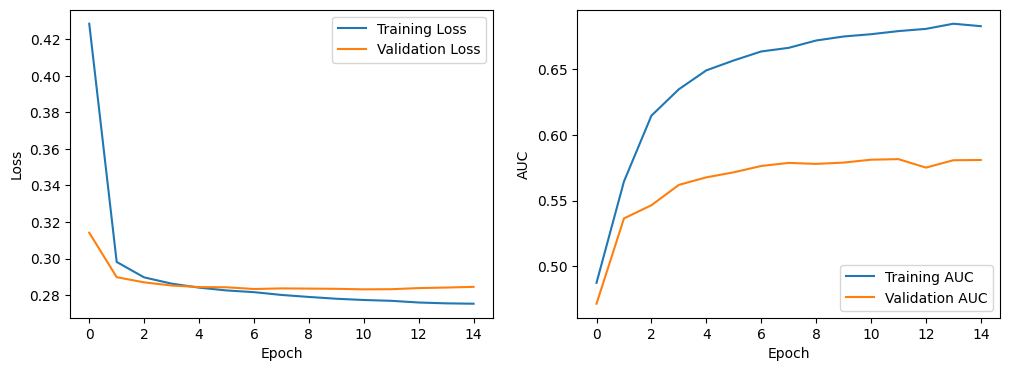

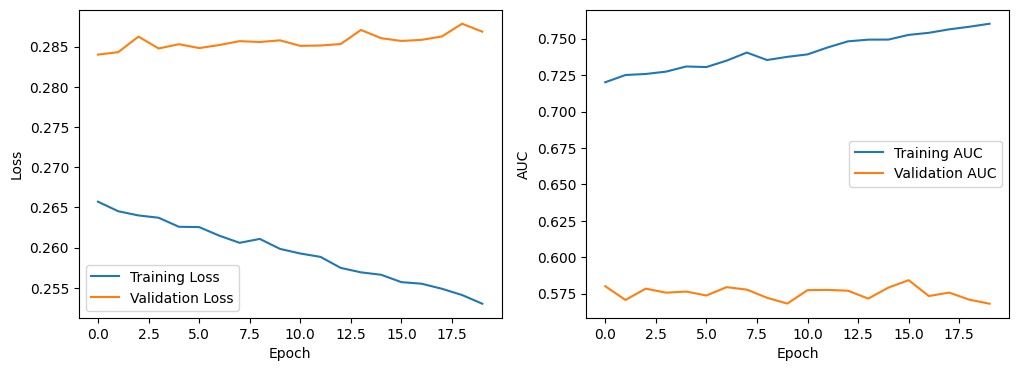

In [71]:
for h in [history, history_clean]:
  plt.figure(figsize=(12, 4))
  for i, (metric, ylabel) in enumerate([('loss', 'Loss'), ('auc_6', 'AUC')]):
      plt.subplot(1, 2, i+1)
      # Check if the metric exists in the history
      if metric in h.history:
          plt.plot(h.history[metric], label=f'Training {ylabel}')
      else:
          print(f"Warning: {metric} not found in history.")
      # plt.plot(h.history[metric], label=f'Training {ylabel}')
      plt.plot(h.history.get(f'val_{metric}', []), label=f'Validation {ylabel}')
      plt.xlabel('Epoch')
      plt.ylabel(ylabel)
      plt.legend()

plt.show()

In [72]:
print(labels_test.value_counts())
print(labels_test.shape)

Florence
0    590
1     50
Name: count, dtype: int64
(640,)


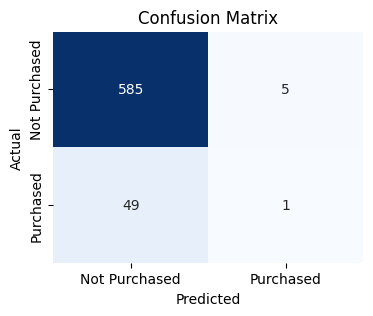

Precision: 0.167
Recall:    0.020
F1:        0.036
Accuracy:  0.916
AUC:       0.506
Using 'clean' data:


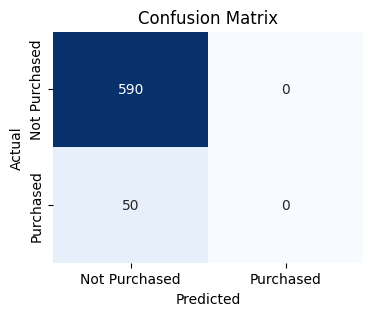

Precision: 0.000
Recall:    0.000
F1:        0.000
Accuracy:  0.922
AUC:       0.500


In [90]:
# Apply test data to both:
y_pred = model.predict(test)
# convert to 0s and 1s:
y_pred = [1 if x > 0.5 else 0 for x in y_pred]
print_confusion_matrix(labels_test, y_pred)

print()
print("Using 'clean' data:")
y_pred_clean = model.predict(clean_test)
y_pred_clean = [1 if x > 0.5 else 0 for x in y_pred_clean]
print_confusion_matrix(clean_labels_test, y_pred_clean)

M                   : 0.3309
FirstPurch          : 0.1337
R                   : 0.1132
F                   : 0.0732
ArtBks              : 0.0594
GeogBks             : 0.0446
ChildBks            : 0.0415
CookBks             : 0.0409
DoItYBks            : 0.0365
YouthBks            : 0.0302
RefBks              : 0.0281
Gender              : 0.0228
ItalCook            : 0.0227
ItalArt             : 0.0126
ItalAtlas           : 0.0095


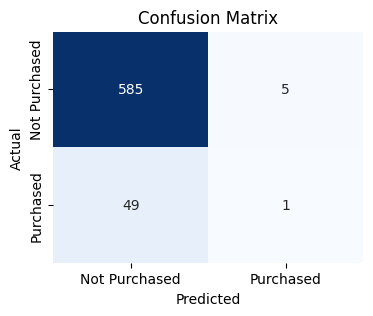

Precision: 0.167
Recall:    0.020
F1:        0.036
Accuracy:  0.916
AUC:       0.506


In [89]:
# Random Forest.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(train_and_val, labels_train_and_val)

# Print list of most important features:
importances = model.feature_importances_
feature_names = train_and_val.columns
sorted_indices = importances.argsort()[::-1]
# Use formatted white space and 4 sig figs:
for i in sorted_indices:
    print(f"{feature_names[i]:20s}: {importances[i]:.4f}")

y_pred = model.predict(test)
print_confusion_matrix(labels_test, y_pred)

# Conclusions

# References

[1] MJC_post_EDA_Data_Mining_Midterm.ipynb

# Print All

In [ ]:
# PRINT TO PDF
# do not include the output from installation.
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc
!pip install nbconvert

# Clear output:
from IPython.display import clear_output
clear_output()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!jupyter nbconvert  '/content/drive/MyDrive/Colab Notebooks/MJC_SS_Data_Mining_Final.ipynb' --to pdf